In [1]:
#Importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Starting Out

### Understanding the data set

When starting out in any project, always look through the data set and understand what it entails. This will help to identify the features, attributes, and also give you a good understanding of which data is useful and which is not. 

To do so, you can use data.head() to get the first 5 rows within the data set. But an even better way would be to open the csv file directly and have a look.

From the head(), you can tell that the attribute is the “diagnosis” column, where M is malignant and B is benign. Also, i know that there are 32 features (from the head()), including the “id”.

In [2]:
bc_data = pd.read_csv('breast_cancer_data.csv')
len(bc_data)
bc_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Bar graph

Now, to plot a simple bar graph that displays the categorical data, you can use “sns.counplot(x = ‘diagnosis’, data = bc_data)”

This will produce a bar graph that visually shows the total amount of M and Bs in the “diagnosis” column. This is useful to verify if the data is skewed towards only 1 attribute.

c:\Users\NicholasTeng\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\NicholasTeng\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\NicholasTeng\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='diagnosis', ylabel='count'>

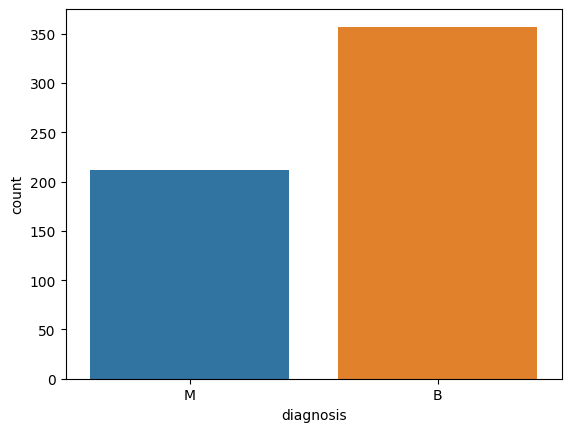

In [3]:
sns.countplot(x = 'diagnosis', data = bc_data)


### Heatmap

Checking for missing values easily, a heat map can be used. “sns.heatmap(bc_data.isna())” will show a heat map and also the missing values if there are any. There, the engineer can decide to use the features or not, if there are too many missing features. But as for what percentage of loss features should be considered before dropping, it really just depends. ChatGPT recommends 70-80%. But if it is less, imputation can be used. (Deserves its own page)

<Axes: >

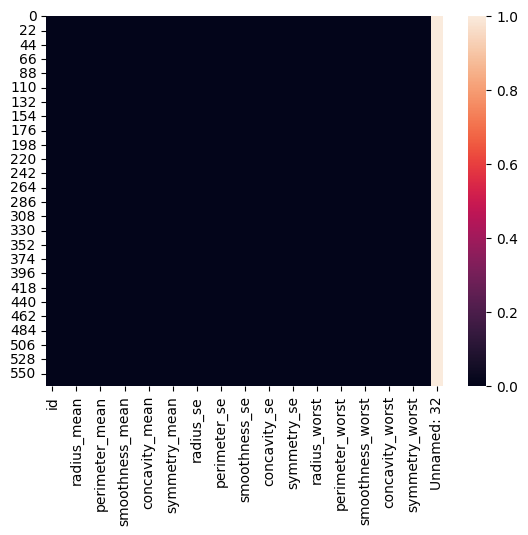

In [4]:
sns.heatmap(bc_data.isna())

### Removing features based on correlation

If a feature has little to no correlation or predictive power for the task you're working on, it might be a good idea to remove it. Irrelevant features can introduce noise and potentially hinder the performance of your model.

To do so, the categorical feature of 'diagnosis' has to be converted into a numerical format. The code below will turn "M" into 1 and the rest (which is only "B") to 0. Correlation Analysis can then be done.

In [5]:
bc_data['diagnosis'] = (bc_data['diagnosis'] == 'M').astype(int)
bc_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Analysing the Correlation table

Based on the Correlation Table, there are several features that have little to no correlation to the attribute. Hence, they are removed. To err on the safe side, only the features are less than 0.02 are removed.

Removing them will reduce the dimensionality of the dataset, leading to faster training times and help to avoid overfitting as well. Moreover, it can potentially help to reduce noise which will hinder the performance of the model.

<Axes: >

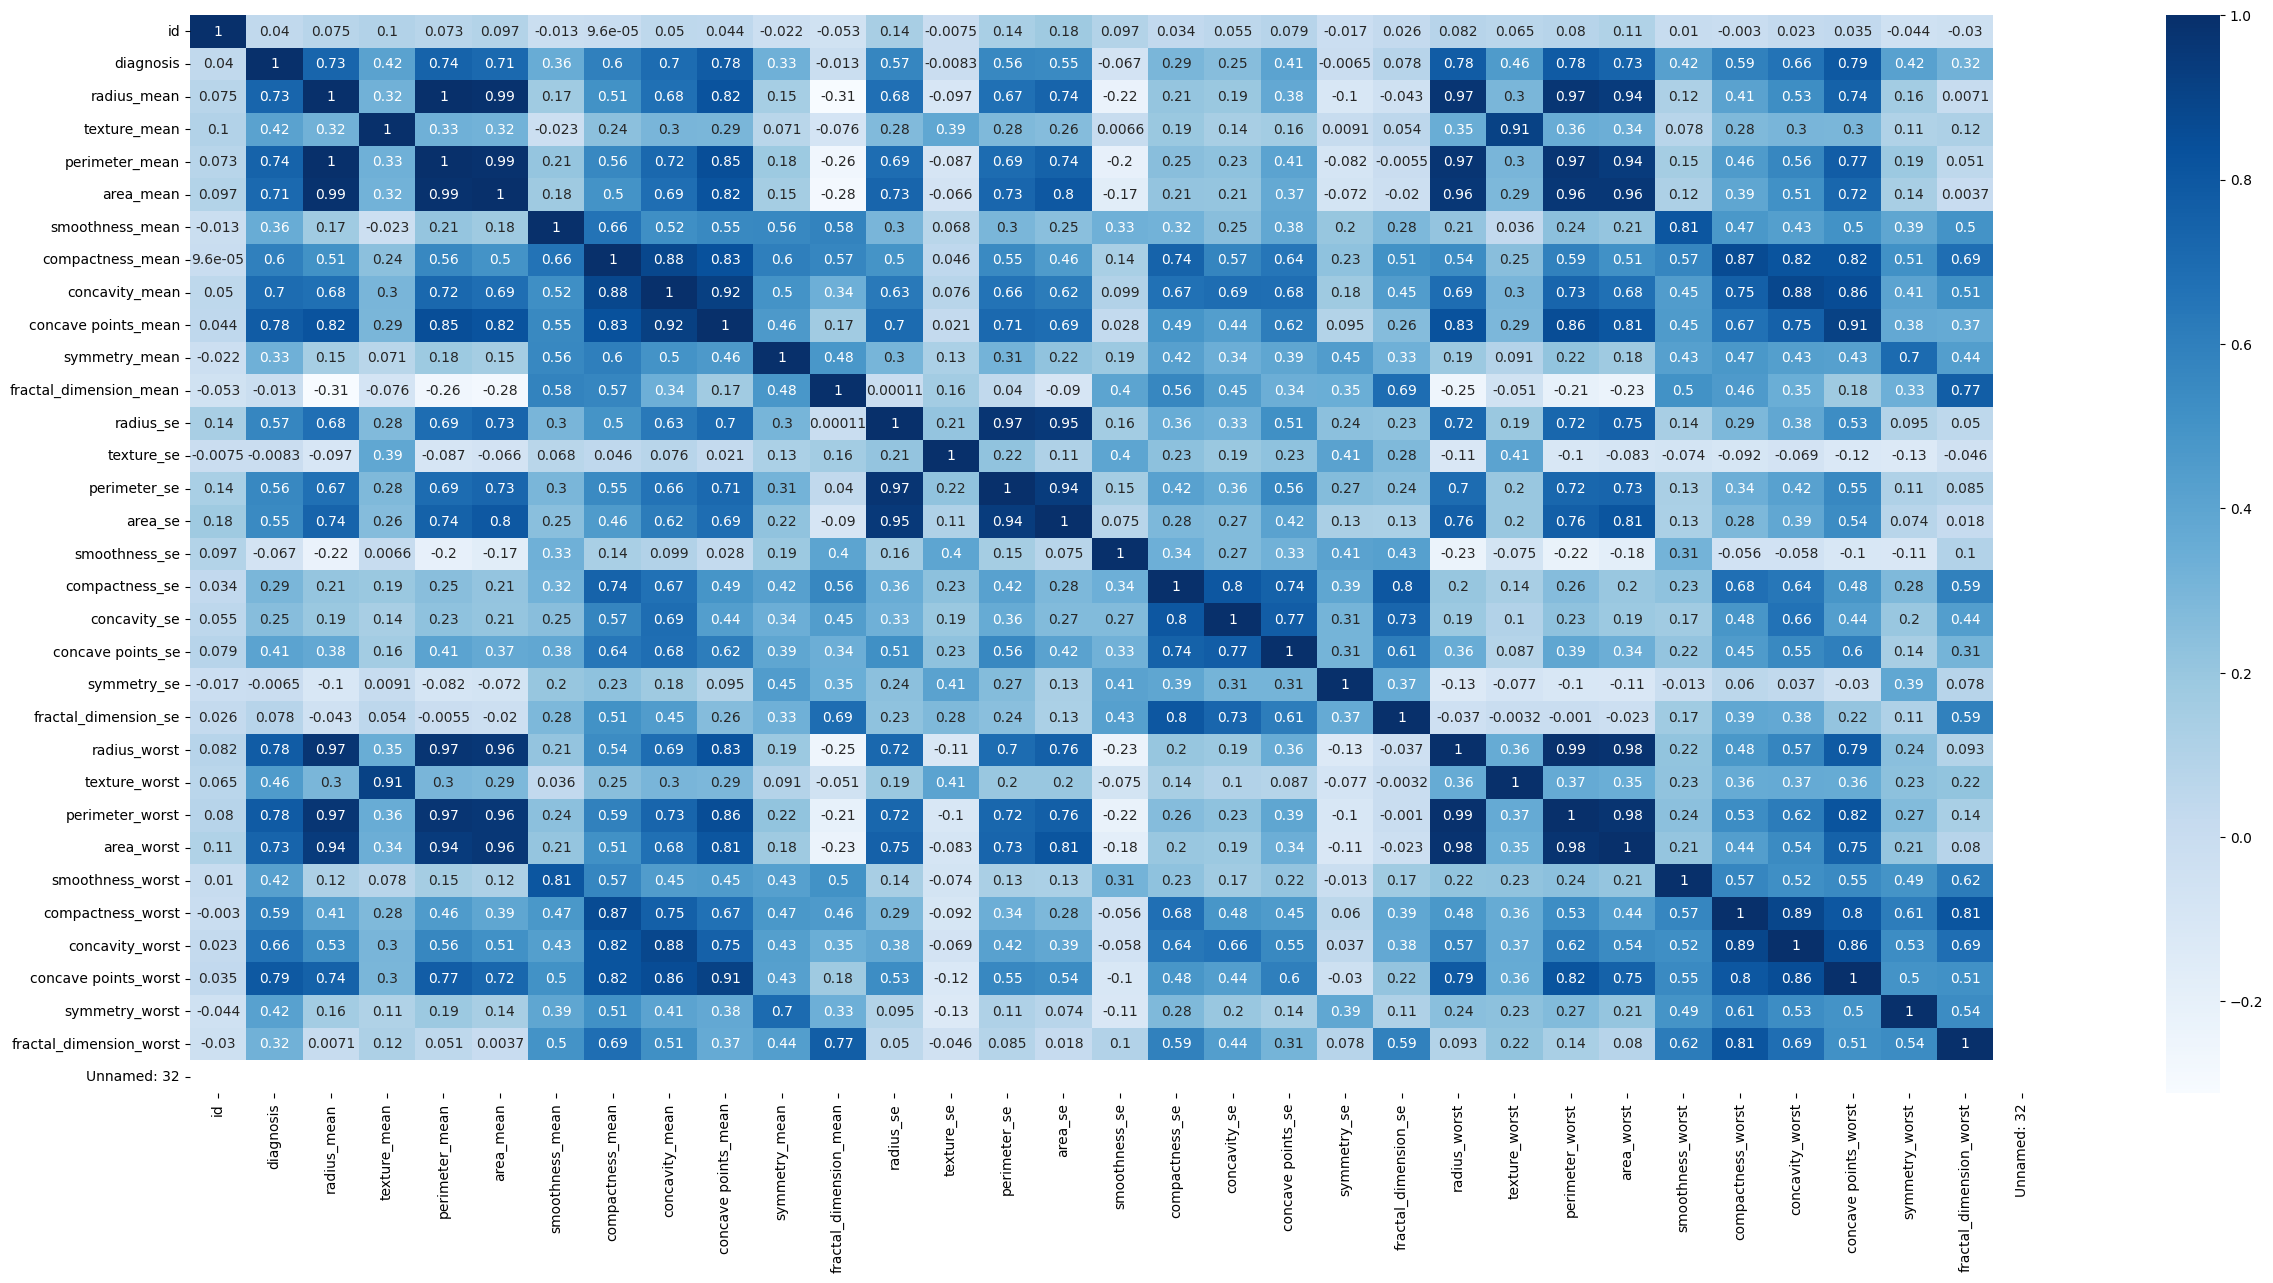

In [9]:
plt.figure(figsize=(30,14))
sns.heatmap(bc_data.corr(),annot=True,cmap='Blues')

In [11]:
bc_data.drop(['Unnamed: 32', 'id','symmetry_se','texture_se','fractal_dimension_mean'], axis = 1, inplace = True)
bc_data.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
from sklearn.model_selection import train_test_split

features = bc_data['diagnosis']
attributes = bc_data.drop(['diagnosis'],axis = 1)
x_train, x_test, y_train, y_test = train_test_split(attributes, features, test_size=0.33, random_state=42)


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix



lr = LogisticRegression()

lr.fit(x_train,y_train)

predict = lr.predict(x_test)

pd.DataFrame(confusion_matrix(y_test, predict), columns = ['Predicted No', 'Predicted Yes'], index = ['Actual No', 'Actual Yes'])

c:\Users\NicholasTeng\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Predicted No,Predicted Yes
Actual No,118,3
Actual Yes,3,64


In [15]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       121
           1       0.96      0.96      0.96        67

    accuracy                           0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188

